In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
for i in range(1,13):
    if i == 1:
        df = pd.read_csv('raw_data/all_energy_statistics' + str(i) +'.csv')
        df_cols = df.columns.to_list()
    else:
        df1 = pd.read_csv('raw_data/all_energy_statistics' + str(i) + '.csv',header=None)
        df1.columns = df_cols
        df = df.append(df1) 

In [36]:
df.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189482 entries, 0 to 89482
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   country_or_area        1189482 non-null  object 
 1   commodity_transaction  1189482 non-null  object 
 2   year                   1189482 non-null  int64  
 3   unit                   1189482 non-null  object 
 4   quantity               1189482 non-null  float64
 5   quantity_footnotes     163946 non-null   float64
 6   category               1189482 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 72.6+ MB


In [38]:
footnotes_nan = df[df['quantity_footnotes'].isna() != True]
footnotes_nan

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
622,Colombia,Additives and Oxygenates - Production,2014,"Metric tons, thousand",34.53,1.0,additives_and_oxygenates
1369,Colombia,Additives and Oxygenates - Total energy supply,2014,"Metric tons, thousand",34.53,1.0,additives_and_oxygenates
1886,Colombia,Additives and Oxygenates - transfers and recyc...,2014,"Metric tons, thousand",34.53,1.0,additives_and_oxygenates
2250,Jordan,Additives and Oxygenates - Transformation,2014,"Metric tons, thousand",103.00,1.0,additives_and_oxygenates
2251,Jordan,Additives and Oxygenates - Transformation,2013,"Metric tons, thousand",101.00,1.0,additives_and_oxygenates
...,...,...,...,...,...,...,...
89470,Vanuatu,Electricity - total wind production,2013,"Kilowatt-hours, million",3.00,1.0,wind_electricity
89472,Vanuatu,Electricity - total wind production,2011,"Kilowatt-hours, million",5.00,1.0,wind_electricity
89476,Viet Nam,Electricity - total wind production,2014,"Kilowatt-hours, million",300.00,1.0,wind_electricity
89477,Viet Nam,Electricity - total wind production,2013,"Kilowatt-hours, million",92.00,1.0,wind_electricity


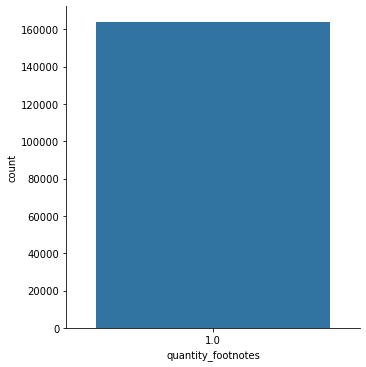

In [39]:
sns.catplot(x='quantity_footnotes',
            data=df,
            kind='count')
plt.show()

I wanted to check whether any commodities were expressed in multiple units. Below is an attempt to display this

In [41]:
categories_and_units = df.drop_duplicates(['unit', 'commodity_transaction'])

categories_and_units.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2468 entries, 0 to 88116
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_or_area        2468 non-null   object 
 1   commodity_transaction  2468 non-null   object 
 2   year                   2468 non-null   int64  
 3   unit                   2468 non-null   object 
 4   quantity               2468 non-null   float64
 5   quantity_footnotes     252 non-null    float64
 6   category               2468 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 154.2+ KB


In [42]:
categories_and_units['commodity_transaction'].nunique()

2452

There are 2452 commods with 2468 rows suggesting some commods have multilpe units.

Below we count the instance of a commodity_transaction and only output those that are repeated. This shows 16 repeats meaning we should be careful using plots with these commodities

In [83]:
multi_units = categories_and_units['commodity_transaction'].value_counts(sort= True)
multi_units[multi_units == 2]

From combustible fuels – Main activity                 2
Nuclear – Main activity                                2
Nuclear – Main activity – CHP plants                   2
Geothermal – Main activity – CHP plants                2
From other sources – Main activity                     2
From combustible fuels – Autoproducer                  2
Solar thermal – Autoproducer                           2
Geothermal – Autoproducer – CHP plants                 2
From other sources – Main activity – CHP plants        2
Geothermal – Autoproducer                              2
From combustible fuels – Autoproducer – CHP plants     2
From other sources – Autoproducer – CHP plants         2
Geothermal – Main activity                             2
Solar thermal – Main activity                          2
From other sources – Autoproducer                      2
From combustible fuels – Main activity – CHP plants    2
Name: commodity_transaction, dtype: int64

In [94]:
multi_units_list = list(multi_units.index[multi_units == 2])
multi_units_list

['From combustible fuels – Main activity',
 'Nuclear – Main activity',
 'Nuclear – Main activity – CHP plants',
 'Geothermal – Main activity – CHP plants',
 'From other sources – Main activity',
 'From combustible fuels – Autoproducer',
 'Solar thermal – Autoproducer',
 'Geothermal – Autoproducer – CHP plants',
 'From other sources – Main activity – CHP plants',
 'Geothermal – Autoproducer',
 'From combustible fuels – Autoproducer – CHP plants',
 'From other sources – Autoproducer – CHP plants',
 'Geothermal – Main activity',
 'Solar thermal – Main activity',
 'From other sources – Autoproducer',
 'From combustible fuels – Main activity – CHP plants']

Below is an analysis of the energy usage of different countries

 

First goals are to get an overview of total energy, followed by specific fuel types

In [77]:
multi_units['Nuclear – Main activity']

2

In [43]:
fuel_total_by_country = df.groupby(['country_or_area', 'category'])['quantity'].sum()
fuel_total_by_country

country_or_area  category                                                   
Afghanistan      aviation_gasoline                                              2.400000e+01
                 charcoal                                                       1.259391e+04
                 electricity_net_installed_capacity_of_electric_power_plants    4.822800e+04
                 falling_water                                                  3.940000e+05
                 fuel_oil                                                       1.520000e+02
                                                                                    ...     
Zimbabwe         other_vegetal_material_and_residues                            1.387903e+07
                 paraffin_waxes                                                 4.800000e+01
                 thermal_electricity                                            1.085878e+05
                 total_electricity                                              1.9616

In [44]:
fuel_total_per_country = df[df['category'] == 'wind_electricity'].pivot_table(index = 'country_or_area', values = 'quantity', fill_value = True).sort_values('quantity', ascending = False)
fuel_total_per_country

,quantity
country_or_area,
China,101641.200000
United States,40094.680000
Germany,21780.125000
Spain,17676.880000
India,8356.000000
...,...
Azerbaijan,1.000000
St. Helena and Depend.,0.908571
St. Pierre-Miquelon,0.856667
